# Part A

• **DOMAIN**: Electronics and Telecommunication

• **CONTEXT**: A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

• **DATA DESCRIPTION**: The data set contains information on various signal tests performed:
1. *Parameters*: Various measurable signal parameters.
2. *Signal_Quality*: Final signal strength or quality

• **PROJECT OBJECTIVE**: To build a classifier which can use the given parameters to determine the signal strength or quality.

**Steps and tasks:**

#### 1. Data import and Understanding

##### A. Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import h5py

import scipy.stats as stats 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import tensorflow as tf
tf.__version__

from tensorflow import keras

#setting the seed
import tensorflow
tensorflow.random.set_seed(42)

from tensorflow.keras.layers import Activation,Flatten, Dense, LeakyReLU, Dropout, BatchNormalization

from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras import regularizers, optimizers

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("D:/Nikhila/PGP - AIML/2. Projects/7. Introduction to Neural Network and Deep Learning/NN Project Data - Signal.csv")

print('Shape of the data', data.shape)
print()

data.head()

Shape of the data (1599, 12)



,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### B. Check for missing values and print percentage for each attribute.

In [3]:
data.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [4]:
#creating a dataframe with sum of missing values
missing_val = pd.DataFrame(data.isnull().sum())

#Rename the column as missing_percentage.
missing_val = missing_val.rename(columns = {0: 'Missing_percentage'})

#Calculating in terms of percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(data))*100

#Arranging in descending order.
missing_val = missing_val.sort_values('Missing_percentage', ascending = False)

missing_val

,Missing_percentage
Parameter 1,0.0
Parameter 2,0.0
Parameter 3,0.0
Parameter 4,0.0
Parameter 5,0.0
Parameter 6,0.0
Parameter 7,0.0
Parameter 8,0.0
Parameter 9,0.0
Parameter 10,0.0


**Observation** - There is no missing values

##### C. Check for presence of duplicate records in the dataset and impute with appropriate method.

In [5]:
data.duplicated().sum()

240

In [6]:
#Drop duplicate rows keeping first occurrence
data = data.drop_duplicates()
data.shape

(1359, 12)

##### D. Visualise distribution of the target variable.

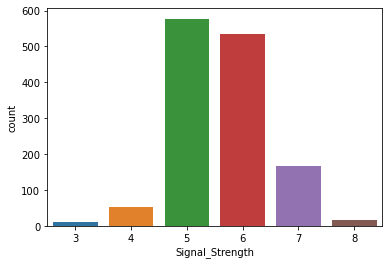

In [7]:
sns.countplot(data['Signal_Strength'])
plt.show()

**Observation** - We can see that signal strength "5" has highest number of count. Followed by "6" and "7"

##### E. Share insights from the initial data analysis (at least 2).

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1359 non-null   float64
 1   Parameter 2      1359 non-null   float64
 2   Parameter 3      1359 non-null   float64
 3   Parameter 4      1359 non-null   float64
 4   Parameter 5      1359 non-null   float64
 5   Parameter 6      1359 non-null   float64
 6   Parameter 7      1359 non-null   float64
 7   Parameter 8      1359 non-null   float64
 8   Parameter 9      1359 non-null   float64
 9   Parameter 10     1359 non-null   float64
 10  Parameter 11     1359 non-null   float64
 11  Signal_Strength  1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 170.3 KB


**Observation** - All the "parameters" are in float dtype and the "signal strength" is an integer dtype.

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
Parameter 2,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
Parameter 3,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
Parameter 4,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
Parameter 5,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
Parameter 6,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
Parameter 7,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
Parameter 8,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
Parameter 9,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
Parameter 10,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


**Observation** - 


1) Mean and Median values are approximately same - i.e, **Data is Normally distributed**.

2) We have difference between the 75% value and max value,- indicating **skewness in the data**.

3) Mean > median. Therefore the distribution is **skewed to the right**.

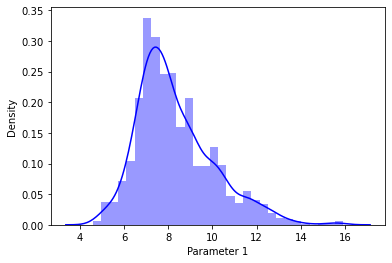

Distribution of  Parameter 1
Mean is: 8.310596026490087
Median is: 7.9
Mode is: 0    7.2
dtype: float64
Standard deviation is: 1.736989807532466
Skewness is: 0.9410413664561449
Maximum is: 15.9
Minimum is: 4.6


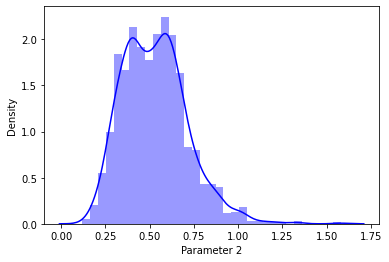

Distribution of  Parameter 2
Mean is: 0.5294775570272258
Median is: 0.52
Mode is: 0    0.5
dtype: float64
Standard deviation is: 0.18303131761907185
Skewness is: 0.7292789463991854
Maximum is: 1.58
Minimum is: 0.12


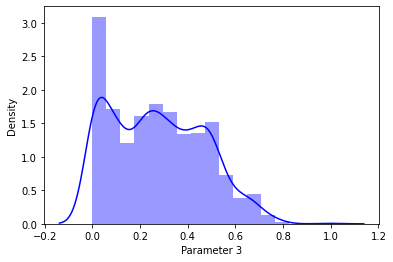

Distribution of  Parameter 3
Mean is: 0.27233259749815975
Median is: 0.26
Mode is: 0    0.0
dtype: float64
Standard deviation is: 0.1955365445504639
Skewness is: 0.31272554238899036
Maximum is: 1.0
Minimum is: 0.0


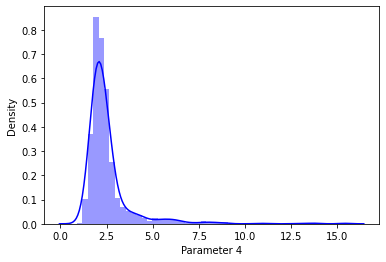

Distribution of  Parameter 4
Mean is: 2.523399558498897
Median is: 2.2
Mode is: 0    2.0
dtype: float64
Standard deviation is: 1.3523137577104198
Skewness is: 4.548153403940447
Maximum is: 15.5
Minimum is: 0.9


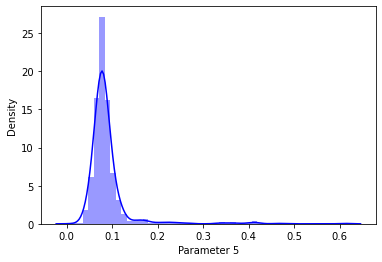

Distribution of  Parameter 5
Mean is: 0.0881236203090504
Median is: 0.079
Mode is: 0    0.08
dtype: float64
Standard deviation is: 0.04937686244348626
Skewness is: 5.502487294623722
Maximum is: 0.611
Minimum is: 0.012


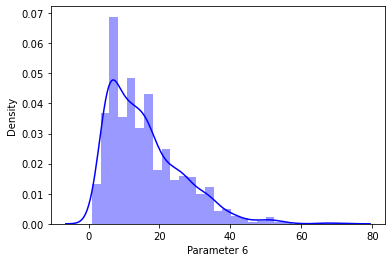

Distribution of  Parameter 6
Mean is: 15.893303899926417
Median is: 14.0
Mode is: 0    6.0
dtype: float64
Standard deviation is: 10.447270259048695
Skewness is: 1.2265794991760643
Maximum is: 72.0
Minimum is: 1.0


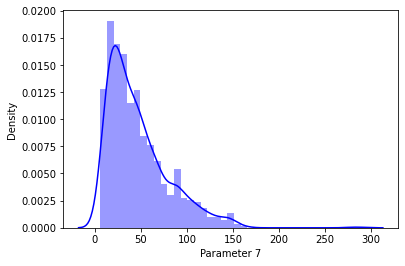

Distribution of  Parameter 7
Mean is: 46.82597498160412
Median is: 38.0
Mode is: 0    28.0
dtype: float64
Standard deviation is: 33.40894570661654
Skewness is: 1.5403680777213933
Maximum is: 289.0
Minimum is: 6.0


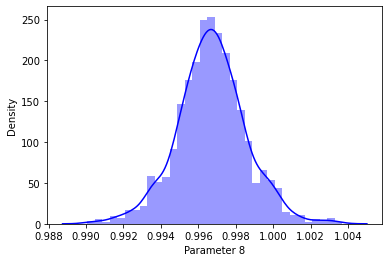

Distribution of  Parameter 8
Mean is: 0.9967089477557026
Median is: 0.9967
Mode is: 0    0.9968
dtype: float64
Standard deviation is: 0.0018689171325591398
Skewness is: 0.04477785573116107
Maximum is: 1.00369
Minimum is: 0.99007


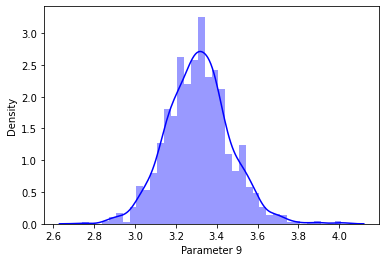

Distribution of  Parameter 9
Mean is: 3.309786607799856
Median is: 3.31
Mode is: 0    3.3
dtype: float64
Standard deviation is: 0.15503631128729595
Skewness is: 0.2320322752014824
Maximum is: 4.01
Minimum is: 2.74


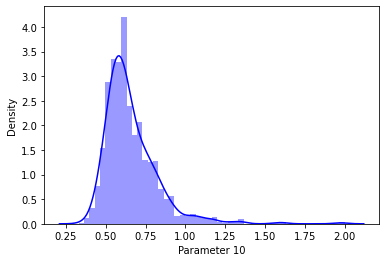

Distribution of  Parameter 10
Mean is: 0.6587049300956593
Median is: 0.62
Mode is: 0    0.54
dtype: float64
Standard deviation is: 0.17066689057420695
Skewness is: 2.4065046145674196
Maximum is: 2.0
Minimum is: 0.33


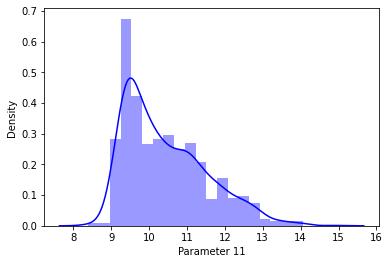

Distribution of  Parameter 11
Mean is: 10.432315428013228
Median is: 10.2
Mode is: 0    9.5
dtype: float64
Standard deviation is: 1.0820654499497833
Skewness is: 0.8598411692319623
Maximum is: 14.9
Minimum is: 8.4


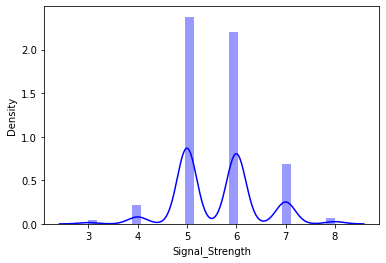

Distribution of  Signal_Strength
Mean is: 5.6232523914643116
Median is: 6.0
Mode is: 0    5
dtype: int64
Standard deviation is: 0.8235780017165619
Skewness is: 0.19240658731658308
Maximum is: 8
Minimum is: 3


In [10]:
cols = list(data)
for i in np.arange(len(cols)):
    sns.distplot(data[cols[i]], color='blue')
    #plt.xlabel('Experience')
    plt.show()
    print('Distribution of ',cols[i])
    print('Mean is:',data[cols[i]].mean())
    print('Median is:',data[cols[i]].median())
    print('Mode is:',data[cols[i]].mode())
    print('Standard deviation is:',data[cols[i]].std())
    print('Skewness is:',data[cols[i]].skew())
    print('Maximum is:',data[cols[i]].max())
    print('Minimum is:',data[cols[i]].min())

<AxesSubplot:>

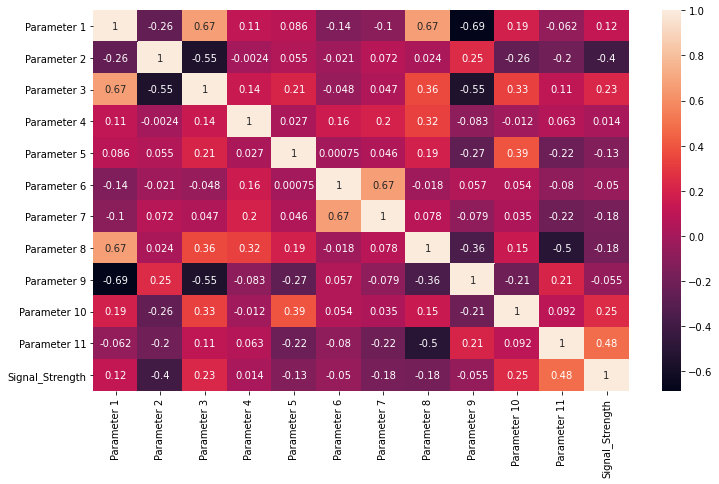

In [11]:
corr=data.corr()
plt.subplots(figsize =(12, 7)) 
sns.heatmap(corr,annot=True)

**Observation** - We can say that the variables are highly correlated if the correlation coefficient value lies between ± 0.50 and ± 1.

1) Parameter 1 is highly correlated with Parameter 3, Parameter 8 and Parameter 9. 

2) Parameter 6 is highly correlated with Parameter 7.

-----------------

#### 2. Data preprocessing

##### A. Split the data into X & Y.

In [12]:
X = data.drop("Signal_Strength", axis=1)
Y = data['Signal_Strength']

##### E. Transform Labels into format acceptable by Neural Network.

In [13]:
print("Before Transforming Labels", Y[7])
Y_cat =tf.keras.utils.to_categorical(Y, num_classes=9)
print("After Transforming Labels",Y_cat[7])

Before Transforming Labels 7
After Transforming Labels [0. 0. 0. 0. 0. 0. 0. 1. 0.]


##### B. Split the data into train & test with 70:30 proportion.

In [14]:
#train and test
xcv_train, x_test, ycv_train, y_test = train_test_split(X,Y_cat, test_size=0.30, random_state=1)

In [15]:
#train and validation
x_train, x_val, y_train, y_val = train_test_split(xcv_train, ycv_train, test_size=0.30, random_state=1)

##### C. Print shape of all the 4 variables and verify if train and test data is in sync.

In [16]:
#shape of X and Y
print(X.shape)
print(Y_cat.shape)

print()

# Shape of train,test and val data
print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of x_val:',x_val.shape)

print()

print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)
print('Shape of y_val:',y_val.shape)

(1359, 11)
(1359, 9)

Shape of x_train: (665, 11)
Shape of x_test: (408, 11)
Shape of x_val: (286, 11)

Shape of y_train: (665, 9)
Shape of y_test: (408, 9)
Shape of y_val: (286, 9)


##### D. Normalise the train and test data with appropriate method.

In [17]:
# Scaling training data
x_train = StandardScaler().fit_transform(x_train)   

# Scaling testing data
x_test = StandardScaler().fit_transform(x_test)

# Scaling testing data
x_val = StandardScaler().fit_transform(x_val)

-------------

#### 3. Model Training & Evaluation using Neural Network

##### A. Design a Neural Network to train a classifier.

1) Design a Neural Network to train a classifier using **Sigmoid activations** , **Softmax** and **SGD optimizer**

In [18]:
model1 = Sequential()
model1.add(Dense(11, activation='sigmoid'))
model1.add(Dense(9, activation='sigmoid'))
model1.add(Dense(9, activation='softmax'))

In [19]:
# Compile the model
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

##### B. Train the classifier using previously designed Architecture

In [20]:
# Fit the model
history1a = model1.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
34/34 [==============================] - 0s 6ms/step - loss: 2.4637 - accuracy: 0.0060 - val_loss: 2.2360 - val_accuracy: 0.0105
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0662 - accuracy: 0.0391 - val_loss: 1.9056 - val_accuracy: 0.3566
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.7959 - accuracy: 0.4662 - val_loss: 1.6907 - val_accuracy: 0.5210
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.6230 - accuracy: 0.4662 - val_loss: 1.5527 - val_accuracy: 0.4615
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.5127 - accuracy: 0.4647 - val_loss: 1.4672 - val_accuracy: 0.4301
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.4438 - accuracy: 0.4346 - val_loss: 1.4095 - val_accuracy: 0.4266
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.3971 - accuracy: 0.4331 - val_loss: 1.3704 - val_accuracy: 0.4266
Epoch 8/100
3

Epoch 59/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1904 - accuracy: 0.4842 - val_loss: 1.1746 - val_accuracy: 0.4720
Epoch 60/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1890 - accuracy: 0.4962 - val_loss: 1.1732 - val_accuracy: 0.4790
Epoch 61/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1878 - accuracy: 0.5023 - val_loss: 1.1716 - val_accuracy: 0.5070
Epoch 62/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1863 - accuracy: 0.5173 - val_loss: 1.1702 - val_accuracy: 0.5070
Epoch 63/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1849 - accuracy: 0.5023 - val_loss: 1.1688 - val_accuracy: 0.5210
Epoch 64/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1836 - accuracy: 0.5158 - val_loss: 1.1675 - val_accuracy: 0.5140
Epoch 65/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1821 - accuracy: 0.5233 - val_loss: 1.1661 - val_accuracy: 0.5175
Epoch 

In [21]:
# score of training data
score_train1a = model1.evaluate(x_train, y_train, verbose=0)
print(score_train1a)

[1.1181323528289795, 0.5458646416664124]


In [22]:
# score of test data
score_test1a = model1.evaluate(x_test, y_test, verbose=0)
print(score_test1a)

[1.1316704750061035, 0.5171568393707275]


##### C. Plot 2 separate visuals

###### i. Training Loss and Validation Loss

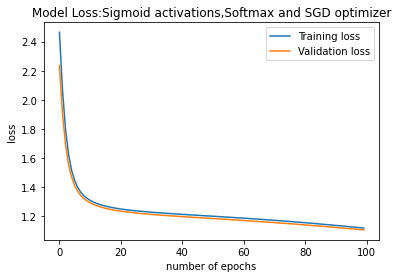

In [23]:
plt.plot(history1a.history['loss'])
plt.plot(history1a.history['val_loss'])
plt.title('Model Loss:Sigmoid activations,Softmax and SGD optimizer')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.legend(['Training loss', 'Validation loss'], loc = 'upper right')
plt.show()

##### ii. Training Accuracy and Validation Accuracy

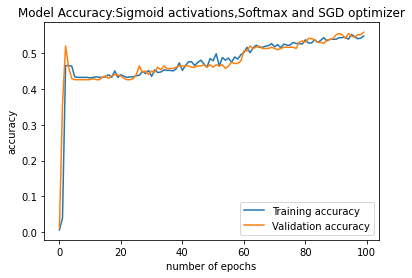

In [24]:
plt.plot(history1a.history['accuracy'])
plt.plot(history1a.history['val_accuracy'])
plt.title('Model Accuracy:Sigmoid activations,Softmax and SGD optimizer')
plt.ylabel('accuracy')
plt.xlabel('number of epochs')
plt.legend(['Training accuracy', 'Validation accuracy'], loc = 'lower right')
plt.show()

##### D. Design new architecture/update existing architecture in attempt to improve the performance of the model.
##### E. Plot visuals as in Q3.C and share insights about difference observed in both the models.

2) Design a Neural Network to train a classifier using **Sigmoid activations** , **Softmax**, **SGD optimizer** and **changing learning rate**

In [25]:
# Compile the model
sgd = optimizers.SGD(lr = 0.01)
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

In [26]:
# Fit the model
history1b = model1.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 1.1177 - accuracy: 0.5504 - val_loss: 1.1052 - val_accuracy: 0.5664
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 1.1159 - accuracy: 0.5489 - val_loss: 1.1032 - val_accuracy: 0.5664
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1137 - accuracy: 0.5579 - val_loss: 1.1015 - val_accuracy: 0.5629
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 1.1117 - accuracy: 0.5519 - val_loss: 1.0994 - val_accuracy: 0.5629
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 1.1096 - accuracy: 0.5564 - val_loss: 1.0977 - val_accuracy: 0.5629
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1076 - accuracy: 0.5504 - val_loss: 1.0957 - val_accuracy: 0.5594
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1053 - accuracy: 0.5549 - val_loss: 1.0941 - val_accuracy: 0.5629
Epoch 8/100
3

Epoch 59/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0204 - accuracy: 0.5774 - val_loss: 1.0202 - val_accuracy: 0.5979
Epoch 60/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0194 - accuracy: 0.5805 - val_loss: 1.0194 - val_accuracy: 0.5979
Epoch 61/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0185 - accuracy: 0.5820 - val_loss: 1.0184 - val_accuracy: 0.5979
Epoch 62/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0174 - accuracy: 0.5835 - val_loss: 1.0176 - val_accuracy: 0.5979
Epoch 63/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0165 - accuracy: 0.5805 - val_loss: 1.0169 - val_accuracy: 0.5944
Epoch 64/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0156 - accuracy: 0.5865 - val_loss: 1.0161 - val_accuracy: 0.5909
Epoch 65/100
34/34 [==============================] - 0s 2ms/step - loss: 1.0148 - accuracy: 0.5895 - val_loss: 1.0154 - val_accuracy: 0.5979
Epoch 

In [27]:
# score of training data
score_train1b = model1.evaluate(x_train, y_train, verbose=0)
print(score_train1b)

[0.9910255670547485, 0.5909774303436279]


In [28]:
# score of test data
score_test1b = model1.evaluate(x_test, y_test, verbose=0)
print(score_test1b)

[1.0608198642730713, 0.5343137383460999]


3) Design a Neural Network to train a classifier using **sigmoid activations** , **Softmax** and **adam optimizer**

In [29]:
model2 = Sequential()
model2.add(Dense(11, activation='sigmoid'))
model2.add(Dense(9, activation='sigmoid'))
model2.add(Dense(9, activation='softmax'))

In [30]:
# Compile the model
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [31]:
# Fit the model
history2a = model2.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 2.3266 - accuracy: 0.0000e+00 - val_loss: 2.1950 - val_accuracy: 0.0000e+00
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0768 - accuracy: 0.0000e+00 - val_loss: 1.9710 - val_accuracy: 0.0000e+00
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.8741 - accuracy: 0.2165 - val_loss: 1.7888 - val_accuracy: 0.4266
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.7109 - accuracy: 0.4331 - val_loss: 1.6436 - val_accuracy: 0.4301
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.5821 - accuracy: 0.4346 - val_loss: 1.5301 - val_accuracy: 0.4301
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.4849 - accuracy: 0.4361 - val_loss: 1.4459 - val_accuracy: 0.4301
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.4131 - accuracy: 0.4406 - val_loss: 1.3816 - val_accuracy: 0.44

34/34 [==============================] - 0s 2ms/step - loss: 0.9602 - accuracy: 0.5835 - val_loss: 0.9888 - val_accuracy: 0.6014
Epoch 59/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9587 - accuracy: 0.5820 - val_loss: 0.9883 - val_accuracy: 0.6014
Epoch 60/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9570 - accuracy: 0.5835 - val_loss: 0.9871 - val_accuracy: 0.6049
Epoch 61/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9556 - accuracy: 0.5850 - val_loss: 0.9862 - val_accuracy: 0.6049
Epoch 62/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9538 - accuracy: 0.5865 - val_loss: 0.9854 - val_accuracy: 0.5979
Epoch 63/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9526 - accuracy: 0.5865 - val_loss: 0.9844 - val_accuracy: 0.5979
Epoch 64/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9511 - accuracy: 0.5880 - val_loss: 0.9844 - val_accuracy: 0.5979
Epoch 65/100
34/34 

In [32]:
# score of training data
score_train2a = model2.evaluate(x_train, y_train, verbose=0)
print(score_train2a)

[0.9098663926124573, 0.5969924926757812]


In [33]:
# score of test data
score_test2a = model2.evaluate(x_test, y_test, verbose=0)
print(score_test2a)

[1.0404585599899292, 0.5392156839370728]


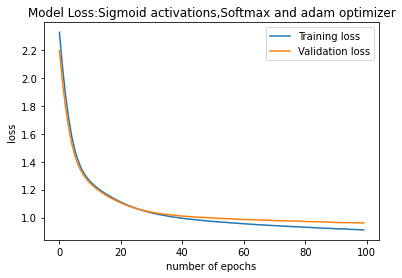

In [34]:
plt.plot(history2a.history['loss'])
plt.plot(history2a.history['val_loss'])
plt.title('Model Loss:Sigmoid activations,Softmax and adam optimizer')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.legend(['Training loss', 'Validation loss'], loc = 'upper right')
plt.show()

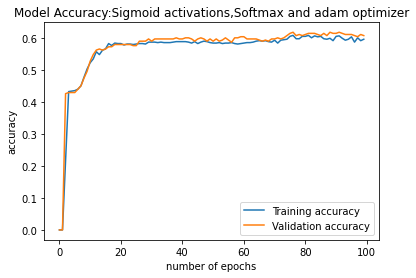

In [35]:
plt.plot(history2a.history['accuracy'])
plt.plot(history2a.history['val_accuracy'])
plt.title('Model Accuracy:Sigmoid activations,Softmax and adam optimizer')
plt.ylabel('accuracy')
plt.xlabel('number of epochs')
plt.legend(['Training accuracy', 'Validation accuracy'], loc = 'lower right')
plt.show()

4) Design a Neural Network to train a classifier using **sigmoid activations** , **Softmax**, **adam optimizer** and **changing learning rate**

In [36]:
# Compile the model
adam = optimizers.Adam(lr = 0.01)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [37]:
# Fit the model
history2b = model2.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
34/34 [==============================] - 0s 5ms/step - loss: 0.9112 - accuracy: 0.6075 - val_loss: 0.9599 - val_accuracy: 0.6084
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9092 - accuracy: 0.6075 - val_loss: 0.9590 - val_accuracy: 0.6014
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9080 - accuracy: 0.6030 - val_loss: 0.9582 - val_accuracy: 0.6084
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9074 - accuracy: 0.6075 - val_loss: 0.9570 - val_accuracy: 0.6049
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9061 - accuracy: 0.6060 - val_loss: 0.9567 - val_accuracy: 0.6049
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9055 - accuracy: 0.6090 - val_loss: 0.9562 - val_accuracy: 0.6119
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9045 - accuracy: 0.6060 - val_loss: 0.9559 - val_accuracy: 0.6119
Epoch 8/100
3

Epoch 59/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8685 - accuracy: 0.6256 - val_loss: 0.9361 - val_accuracy: 0.6014
Epoch 60/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8680 - accuracy: 0.6286 - val_loss: 0.9360 - val_accuracy: 0.6014
Epoch 61/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8673 - accuracy: 0.6286 - val_loss: 0.9359 - val_accuracy: 0.6049
Epoch 62/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8665 - accuracy: 0.6301 - val_loss: 0.9357 - val_accuracy: 0.6014
Epoch 63/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8662 - accuracy: 0.6256 - val_loss: 0.9355 - val_accuracy: 0.6049
Epoch 64/100
34/34 [==============================] - 0s 3ms/step - loss: 0.8658 - accuracy: 0.6301 - val_loss: 0.9363 - val_accuracy: 0.6014
Epoch 65/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8648 - accuracy: 0.6301 - val_loss: 0.9353 - val_accuracy: 0.6014
Epoch 

In [38]:
# score of training data
score_train2b = model2.evaluate(x_train, y_train, verbose=0)
print(score_train2b)

[0.8482216000556946, 0.6345864534378052]


In [39]:
# score of test data
score_test2b = model2.evaluate(x_test, y_test, verbose=0)
print(score_test2b)

[1.0548862218856812, 0.5539215803146362]


5) Design a Neural Network to train a classifier using **relu activations** , **Softmax** and **SGD optimizer** 

In [40]:
model3 = Sequential()
model3.add(Dense(11, activation='relu'))
model3.add(Dense(9, activation='relu'))
model3.add(Dense(9, activation='softmax'))

In [41]:
# Compile the model
model3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

In [42]:
# Fit the model
history3a = model3.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
34/34 [==============================] - 0s 5ms/step - loss: 2.0146 - accuracy: 0.3820 - val_loss: 1.9178 - val_accuracy: 0.4266
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 1.8398 - accuracy: 0.4286 - val_loss: 1.7646 - val_accuracy: 0.4266
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.6944 - accuracy: 0.4331 - val_loss: 1.6386 - val_accuracy: 0.4266
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.5759 - accuracy: 0.4331 - val_loss: 1.5317 - val_accuracy: 0.4266
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.4767 - accuracy: 0.4361 - val_loss: 1.4460 - val_accuracy: 0.4336
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.3989 - accuracy: 0.4436 - val_loss: 1.3772 - val_accuracy: 0.4510
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.3381 - accuracy: 0.4662 - val_loss: 1.3248 - val_accuracy: 0.4615
Epoch 8/100
3

Epoch 59/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9441 - accuracy: 0.6211 - val_loss: 0.9844 - val_accuracy: 0.5769
Epoch 60/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9426 - accuracy: 0.6180 - val_loss: 0.9830 - val_accuracy: 0.5734
Epoch 61/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9414 - accuracy: 0.6211 - val_loss: 0.9817 - val_accuracy: 0.5769
Epoch 62/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9392 - accuracy: 0.6211 - val_loss: 0.9812 - val_accuracy: 0.5839
Epoch 63/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9381 - accuracy: 0.6241 - val_loss: 0.9805 - val_accuracy: 0.5734
Epoch 64/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9363 - accuracy: 0.6226 - val_loss: 0.9787 - val_accuracy: 0.5804
Epoch 65/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9349 - accuracy: 0.6256 - val_loss: 0.9782 - val_accuracy: 0.5804
Epoch 

In [43]:
# score of training data
score_train3a = model3.evaluate(x_train, y_train, verbose=0)
print(score_train3a)

[0.8872542977333069, 0.6451127529144287]


In [44]:
# score of test data
score_test3a = model3.evaluate(x_test, y_test, verbose=0)
print(score_test3a)

[1.114734411239624, 0.531862735748291]


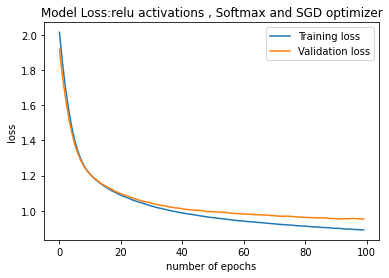

In [45]:
plt.plot(history3a.history['loss'])
plt.plot(history3a.history['val_loss'])
plt.title('Model Loss:relu activations , Softmax and SGD optimizer')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.legend(['Training loss', 'Validation loss'], loc = 'upper right')
plt.show()

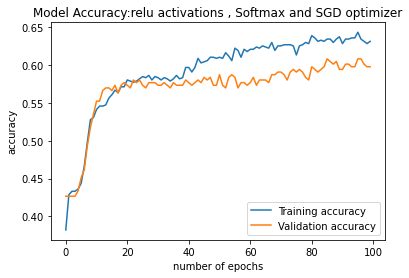

In [46]:
plt.plot(history3a.history['accuracy'])
plt.plot(history3a.history['val_accuracy'])
plt.title('Model Accuracy:relu activations , Softmax and SGD optimizer')
plt.ylabel('accuracy')
plt.xlabel('number of epochs')
plt.legend(['Training accuracy', 'Validation accuracy'], loc = 'lower right')
plt.show()

6) Design a Neural Network to train a classifier using **relu activations** , **Softmax**, **SGD optimizer** and **changing learning rate**

In [47]:
# Compile the model
sgd = optimizers.SGD(lr = 0.01)
model3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

In [48]:
# Fit the model
history3b = model3.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
34/34 [==============================] - 0s 6ms/step - loss: 0.8905 - accuracy: 0.6361 - val_loss: 0.9520 - val_accuracy: 0.6049
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8905 - accuracy: 0.6376 - val_loss: 0.9515 - val_accuracy: 0.5979
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8880 - accuracy: 0.6451 - val_loss: 0.9518 - val_accuracy: 0.5979
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8874 - accuracy: 0.6361 - val_loss: 0.9508 - val_accuracy: 0.5979
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8859 - accuracy: 0.6436 - val_loss: 0.9531 - val_accuracy: 0.6014
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8856 - accuracy: 0.6361 - val_loss: 0.9500 - val_accuracy: 0.5944
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8838 - accuracy: 0.6466 - val_loss: 0.9542 - val_accuracy: 0.6084
Epoch 8/100
3

Epoch 59/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8502 - accuracy: 0.6466 - val_loss: 0.9453 - val_accuracy: 0.5944
Epoch 60/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8500 - accuracy: 0.6526 - val_loss: 0.9458 - val_accuracy: 0.5839
Epoch 61/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8499 - accuracy: 0.6556 - val_loss: 0.9448 - val_accuracy: 0.6014
Epoch 62/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8488 - accuracy: 0.6541 - val_loss: 0.9452 - val_accuracy: 0.6014
Epoch 63/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8489 - accuracy: 0.6541 - val_loss: 0.9454 - val_accuracy: 0.6014
Epoch 64/100
34/34 [==============================] - 0s 1ms/step - loss: 0.8477 - accuracy: 0.6617 - val_loss: 0.9453 - val_accuracy: 0.5944
Epoch 65/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8478 - accuracy: 0.6556 - val_loss: 0.9459 - val_accuracy: 0.5909
Epoch 

In [49]:
# score of training data
score_train3b = model3.evaluate(x_train, y_train, verbose=0)
print(score_train3b)

[0.8263626098632812, 0.6781954765319824]


In [50]:
# score of test data
score_test3b = model3.evaluate(x_test, y_test, verbose=0)
print(score_test3b)

[1.1415187120437622, 0.5367646813392639]


7) Design a Neural Network to train a classifier using **relu activations** , **Softmax** and **adam optimizer**

In [51]:
model4 = Sequential()
model4.add(Dense(11, activation='relu'))
model4.add(Dense(9, activation='relu'))
model4.add(Dense(9, activation='softmax'))

In [52]:
# Compile the model
model4.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [53]:
# Fit the model
history4a = model4.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
34/34 [==============================] - 0s 5ms/step - loss: 2.3118 - accuracy: 0.1368 - val_loss: 2.1087 - val_accuracy: 0.2273
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 2.0136 - accuracy: 0.2782 - val_loss: 1.8638 - val_accuracy: 0.3601
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.7876 - accuracy: 0.3850 - val_loss: 1.6672 - val_accuracy: 0.4196
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.5989 - accuracy: 0.4586 - val_loss: 1.5016 - val_accuracy: 0.4965
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 1.4473 - accuracy: 0.5098 - val_loss: 1.3771 - val_accuracy: 0.5455
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 1.3398 - accuracy: 0.5353 - val_loss: 1.2904 - val_accuracy: 0.5524
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.2633 - accuracy: 0.5338 - val_loss: 1.2289 - val_accuracy: 0.5490
Epoch 8/100
3

Epoch 59/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8456 - accuracy: 0.6481 - val_loss: 0.9686 - val_accuracy: 0.6014
Epoch 60/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8434 - accuracy: 0.6496 - val_loss: 0.9703 - val_accuracy: 0.6049
Epoch 61/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8416 - accuracy: 0.6481 - val_loss: 0.9708 - val_accuracy: 0.5979
Epoch 62/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8400 - accuracy: 0.6436 - val_loss: 0.9708 - val_accuracy: 0.5979
Epoch 63/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8380 - accuracy: 0.6481 - val_loss: 0.9716 - val_accuracy: 0.5979
Epoch 64/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8367 - accuracy: 0.6466 - val_loss: 0.9736 - val_accuracy: 0.5979
Epoch 65/100
34/34 [==============================] - 0s 2ms/step - loss: 0.8348 - accuracy: 0.6451 - val_loss: 0.9729 - val_accuracy: 0.5909
Epoch 

In [54]:
# score of training data
score_train4a = model4.evaluate(x_train, y_train, verbose=0)
print(score_train4a)

[0.7889858484268188, 0.6586466431617737]


In [55]:
# score of test data
score_test4a = model4.evaluate(x_test, y_test, verbose=0)
print(score_test4a)

[1.1262298822402954, 0.531862735748291]


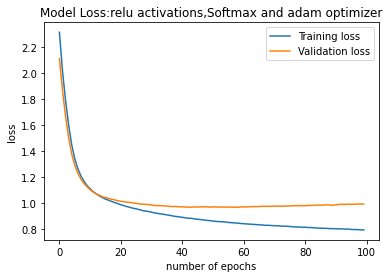

In [56]:
plt.plot(history4a.history['loss'])
plt.plot(history4a.history['val_loss'])
plt.title('Model Loss:relu activations,Softmax and adam optimizer')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.legend(['Training loss', 'Validation loss'], loc = 'upper right')
plt.show()

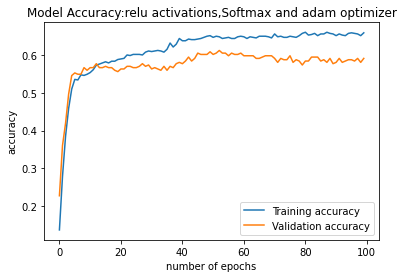

In [57]:
plt.plot(history4a.history['accuracy'])
plt.plot(history4a.history['val_accuracy'])
plt.title('Model Accuracy:relu activations,Softmax and adam optimizer')
plt.ylabel('accuracy')
plt.xlabel('number of epochs')
plt.legend(['Training accuracy', 'Validation accuracy'], loc = 'lower right')
plt.show()

8) Design a Neural Network to train a classifier using **relu activations** , **Softmax**, **adam optimizer** and **changing learning rate**

In [58]:
# Compile the model
adam = optimizers.Adam(lr = 0.01)
model4.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [59]:
# Fit the model
history4b = model4.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 0.7956 - accuracy: 0.6541 - val_loss: 0.9931 - val_accuracy: 0.5909
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7919 - accuracy: 0.6571 - val_loss: 0.9924 - val_accuracy: 0.5839
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7907 - accuracy: 0.6556 - val_loss: 0.9926 - val_accuracy: 0.5839
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7924 - accuracy: 0.6556 - val_loss: 0.9934 - val_accuracy: 0.5874
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7902 - accuracy: 0.6541 - val_loss: 0.9948 - val_accuracy: 0.5909
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7901 - accuracy: 0.6647 - val_loss: 0.9950 - val_accuracy: 0.5909
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 0.7886 - accuracy: 0.6571 - val_loss: 0.9964 - val_accuracy: 0.5839
Epoch 8/100
3

Epoch 59/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7553 - accuracy: 0.6662 - val_loss: 1.0266 - val_accuracy: 0.5944
Epoch 60/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7542 - accuracy: 0.6662 - val_loss: 1.0287 - val_accuracy: 0.5804
Epoch 61/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7537 - accuracy: 0.6647 - val_loss: 1.0298 - val_accuracy: 0.5874
Epoch 62/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7539 - accuracy: 0.6647 - val_loss: 1.0289 - val_accuracy: 0.5839
Epoch 63/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7525 - accuracy: 0.6617 - val_loss: 1.0298 - val_accuracy: 0.5874
Epoch 64/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7522 - accuracy: 0.6752 - val_loss: 1.0312 - val_accuracy: 0.5874
Epoch 65/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7512 - accuracy: 0.6752 - val_loss: 1.0321 - val_accuracy: 0.5769
Epoch 

In [60]:
# score of training data
score_train4b = model4.evaluate(x_train, y_train, verbose=0)
print(score_train4b)

[0.7278504967689514, 0.6781954765319824]


In [61]:
# score of test data
score_test4b = model4.evaluate(x_test, y_test, verbose=0)
print(score_test4b)

[1.2436796426773071, 0.5367646813392639]


**Conclusion** - 

We have Designed a Neural Network to train a classifier using below combinations to improve the accuracy and reduce the loss.

1. **Sigmoid activations, Softmax and SGD optimizer** - The loss and accuracy that we get on the training data is similar to the loss and accuracy on the test data. Loss maybe large and accuracy is less but it will not change between train and test data.

2. **Sigmoid activations, Softmax, SGD optimizer and changing learning rate** - The loss that we get on the training data is similar to the loss on the test data. Accuracy is more in training data and less in test data.

3. **Sigmoid activations, Softmax and adam** - The loss that we get on the training data is similar to the loss on the test data. Accuracy is more in training data and less in test data.

4. **Sigmoid activations, Softmax and adam and changing learning rate** - The loss and accuracy that we get on the training data is different to the loss and accuracy on the test data. In test data, Loss increases and accuracy reduces.

5. **relu activations, Softmax and sgd optimizer** - The loss and accuracy that we get on the training data is different to the loss and accuracy on the test data. In test data, Loss increases and accuracy reduces.

6. **relu activations, Softmax and sgd optimizer and changing learning rate** - The loss and accuracy that we get on the training data is different to the loss and accuracy on the test data. In test data, Loss increases and accuracy reduces.

7. **relu activations, Softmax and adam optimizer** - The loss and accuracy that we get on the training data is different to the loss and accuracy on the test data. In test data, Loss increases and accuracy reduces.

8. **relu activations, Softmax and adam optimizer and changing learning rate** - The loss and accuracy that we get on the training data is different to the loss and accuracy on the test data. In test data, Loss increases and accuracy reduces.

As a trade-off, We can use below combination to improve the performance of the model.

a) **Sigmoid activations, Softmax and SGD optimizer** 

b) **Sigmoid activations, Softmax and adam**

-----------------

# Part B

• **DOMAIN**: Autonomous Vehicles

• **CONTEXT**: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

• **DATA DESCRIPTION**: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

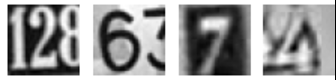

Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/ Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF http://ufldl.stanford.edu/housenumbers as the URL for this site.

• **PROJECT OBJECTIVE**: To build a digit classifier on the SVHN (Street View Housing Number) dataset.
Steps and tasks:

#### 1. Data Import and Exploration

##### A. Read the .h5 file and assign to a variable.

In [62]:
h5_SVH = h5py.File('D:/Nikhila/PGP - AIML/2. Projects/7. Introduction to Neural Network and Deep Learning/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

##### B. Print all the keys from the .h5 file.

In [63]:
h5_SVH.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

##### C. Split the data into X_train, X_test, Y_train, Y_test.

In [64]:
X_train = h5_SVH['X_train'][:]
y_train = h5_SVH['y_train'][:]
X_test = h5_SVH['X_test'][:]
y_test = h5_SVH['y_test'][:]

#Validation
X_val = h5_SVH['X_val'][:]
y_val = h5_SVH['y_val'][:]

--------------

#### 2. Data Visualisation and preprocessing

##### A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [65]:
print('Shape of Train set', X_train .shape, y_train.shape)
print('Shape of Test set', X_test.shape, y_test.shape)

print()

print('Unique labels in y_train:', np.unique(y_train))
print('Unique labels in y_test:', np.unique(y_test))

print()

#Validation
print('Shape of Validation set', X_val.shape, y_val.shape)
print('Unique labels in y_val:', np.unique(y_val))

Shape of Train set (42000, 32, 32) (42000,)
Shape of Test set (18000, 32, 32) (18000,)

Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]

Shape of Validation set (60000, 32, 32) (60000,)
Unique labels in y_val: [0 1 2 3 4 5 6 7 8 9]


##### B. Visualise first 10 images in train data and print its corresponding labels.

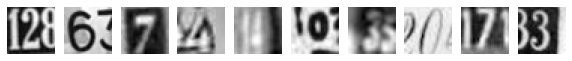

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [66]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

##### C. Reshape all the images with appropriate shape update the data in same variable.

In [67]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

#Validation
X_val = X_val.reshape((X_val.shape[0], -1))

In [68]:
print('X_train:', X_train.shape)
print('X_test shape:', X_test.shape)

print()

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print()

print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])

print()

#Validation
print("Validation Set")
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)
print('Number of images in X_val', X_val.shape[0])

X_train: (42000, 1024)
X_test shape: (18000, 1024)

y_train shape: (42000,)
y_test shape: (18000,)

Number of images in x_train 42000
Number of images in x_test 18000

Validation Set
X_val shape: (60000, 1024)
y_val shape: (60000,)
Number of images in X_val 60000


##### D. Normalise the images i.e. Normalise the pixel values.

In [69]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

#Validation
X_val = X_val.astype('float32')
X_val /= 255

##### E. Transform Labels into format acceptable by Neural Network.

In [70]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Validation
y_val = to_categorical(y_val)

In [71]:
print('X_train:', X_train.shape)
print('X_test shape:', X_test.shape)

print()

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print()

print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])

print()

#Validation
print("Validation Set")
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)
print('Number of images in X_val', X_val.shape[0])

X_train: (42000, 1024)
X_test shape: (18000, 1024)

y_train shape: (42000, 10)
y_test shape: (18000, 10)

Number of images in x_train 42000
Number of images in x_test 18000

Validation Set
X_val shape: (60000, 1024)
y_val shape: (60000, 10)
Number of images in X_val 60000


##### F. Print total Number of classes in the Dataset.

In [72]:
print("The number of classes in this dataset are:",y_test.shape[1] )

The number of classes in this dataset are: 10


-------------------------

#### 3. Model Training & Evaluation using Neural Network

##### A. Design a Neural Network to train a classifier.

**NOTE** - 
(A) Previously designed a Neural Network to train a classifier using **Sigmoid activations** and **SGD optimizer** - Which yielded *very low Validation score* and *changing learning rate further reduces it*.

(B) Now we will try with **relu activation** and **SGD optimizer**

In [73]:
def train_and_test_loop(iterations, lr, Lambda, verb=True):

    #Hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10
    
    #Model with relu activation
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
     
    #SGD optimiser   
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    
    #Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    #Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

##### B. Train the classifier using previously designed Architecture (Use best suitable parameters).

###### Sanity checks!!!

##### a) Double Check that the loss is reasonable. Disable the regularization (Lambda = 0)

In [74]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

42/42 [==============================] - 1s 12ms/step - loss: 2.3546 - accuracy: 0.1034


[2.3519508838653564, 0.10350000113248825]

###### b) Now, lets crank up the Lambda(Regularization)and check what it does to our loss function.

In [75]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

42/42 [==============================] - 1s 12ms/step - loss: 3313.1868 - accuracy: 0.0990


[100.71603393554688, 0.10073809325695038]

##### c) Now, lets overfit to a small subset of our dataset, in this case 20 images, to ensure our model architecture is good

In [76]:
X_train_subset = X_train[0:20]
y_train_subset = y_train[0:20]

X_train = X_train_subset
y_train = y_train_subset

print(X_train.shape)
print(y_train.shape)

(20, 1024)
(20, 10)


In [77]:
lr = 0.01
Lambda = 0
train_and_test_loop(500, lr, Lambda)

Epoch 1/500
1/1 [==============================] - 0s 273ms/step - loss: 2.3263 - accuracy: 0.1000
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 2.1913 - accuracy: 0.2000
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 2.0247 - accuracy: 0.2500
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 1.9120 - accuracy: 0.3000
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 1.8568 - accuracy: 0.2500
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 1.8338 - accuracy: 0.3000
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 1.8153 - accuracy: 0.4500
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 1.7899 - accuracy: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 1.7453 - accuracy: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 1.6920 - accuracy: 0.5500
Epoch 11/500
1/1 [=========

1/1 [==============================] - 0s 4ms/step - loss: 0.0485 - accuracy: 1.0000
Epoch 85/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0468 - accuracy: 1.0000
Epoch 86/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0452 - accuracy: 1.0000
Epoch 87/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0437 - accuracy: 1.0000
Epoch 88/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0423 - accuracy: 1.0000
Epoch 89/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 1.0000
Epoch 90/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0397 - accuracy: 1.0000
Epoch 91/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0385 - accuracy: 1.0000
Epoch 92/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0374 - accuracy: 1.0000
Epoch 93/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0363 - accuracy: 1.0000
Epoch 94/500
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 168/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 169/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 170/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 171/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 172/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 173/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 174/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 175/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 176/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 177/500
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 250/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 251/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 252/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 253/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 254/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 255/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 256/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 257/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 258/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 259/500
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 332/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 333/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 334/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 335/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 336/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 337/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 338/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 339/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 340/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 341/500
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 414/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 415/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 416/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 417/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 418/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 419/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 420/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 421/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 422/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 423/500
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 496/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 497/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 498/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 499/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 500/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000


[0.002424202160909772, 1.0]

**Observation** - Very small loss,  train accuracy going to 100, nice! We are successful in overfitting. The model architecture looks fine. Lets go for fine tuning it.

#### Loading the original dataset again !!!

In [78]:
h5_SVH = h5py.File('D:/Nikhila/PGP - AIML/2. Projects/7. Introduction to Neural Network and Deep Learning/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [79]:
X_train = h5_SVH['X_train'][:]
y_train = h5_SVH['y_train'][:]
X_test = h5_SVH['X_test'][:]
y_test = h5_SVH['y_test'][:]

#Validation
X_val = h5_SVH['X_val'][:]
y_val = h5_SVH['y_val'][:]

In [80]:
#Re-shape
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
#Validation
X_val = X_val.reshape((X_val.shape[0], -1))

#Normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
#Validation
X_val = X_val.astype('float32')
X_val /= 255

#one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#Validation
y_val = to_categorical(y_val)

In [81]:
print('x_train:', X_train.shape)
print('x_test shape:', X_test.shape)

print()

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

print()

print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])

#Validation
print("Validation Set")
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)
print('Number of images in X_val', X_val.shape[0])

x_train: (42000, 1024)
x_test shape: (18000, 1024)

y_train shape: (42000, 10)
y_test shape: (18000, 10)

Number of images in x_train 42000
Number of images in x_test 18000
Validation Set
X_val shape: (60000, 1024)
y_val shape: (60000, 10)
Number of images in X_val 60000


##### d) Start with small regularization and find learning rate that makes the loss go down.

- we start with Lambda(small regularization) = 1e-7
- we start with a small learning rate = 1e-7

In [82]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
42/42 [==============================] - 1s 14ms/step - loss: 2.3555 - accuracy: 0.1079
Epoch 2/20
42/42 [==============================] - 1s 12ms/step - loss: 2.3554 - accuracy: 0.1079
Epoch 3/20
42/42 [==============================] - 0s 11ms/step - loss: 2.3554 - accuracy: 0.1079
Epoch 4/20
42/42 [==============================] - 0s 12ms/step - loss: 2.3553 - accuracy: 0.1079
Epoch 5/20
42/42 [==============================] - 0s 10ms/step - loss: 2.3552 - accuracy: 0.1079
Epoch 6/20
42/42 [==============================] - 0s 11ms/step - loss: 2.3551 - accuracy: 0.1080
Epoch 7/20
42/42 [==============================] - 0s 11ms/step - loss: 2.3550 - accuracy: 0.1080
Epoch 8/20
42/42 [==============================] - 0s 10ms/step - loss: 2.3550 - accuracy: 0.1080
Epoch 9/20
42/42 [==============================] - 0s 10ms/step - loss: 2.3549 - accuracy: 0.1080
Epoch 10/20
42/42 [==============================] - 0s 11ms/step - loss: 2.3548 - accuracy: 0.1080
Epoch 11/

[2.3540163040161133, 0.10790476202964783]

**Observation** - Loss barely changing. Learning rate is probably too low.

##### e) Okay now lets try a larger learning rate

- Learning rate lr = 1e8
- Regularization lambda = 1e-7

In [83]:
lr = 1e8
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
42/42 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.0999
Epoch 2/20
42/42 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0997
Epoch 3/20
42/42 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0997
Epoch 4/20
42/42 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0997
Epoch 5/20
42/42 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0997
Epoch 6/20
42/42 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0997
Epoch 7/20
42/42 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0997
Epoch 8/20
42/42 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0997
Epoch 9/20
42/42 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0997
Epoch 10/20
42/42 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0997
Epoch 11/20
42/42 [===========================

[nan, 0.09966666996479034]

**Observation** - Loss exploding. Learning rate is too high.

##### f) Lets try to train now with a value of learning rate between 1e-7 and 1e8

- learning rate = 1e4
- regularization remains the small, lambda = 1e-7

In [84]:
lr = 1e4
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
42/42 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.1008
Epoch 2/20
42/42 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0997
Epoch 3/20
42/42 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0997
Epoch 4/20
42/42 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0997
Epoch 5/20
42/42 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0997
Epoch 6/20
42/42 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0997
Epoch 7/20
42/42 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0997
Epoch 8/20
42/42 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0997
Epoch 9/20
42/42 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0997
Epoch 10/20
42/42 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0997
Epoch 11/20
42/42 [======================

[nan, 0.09966666996479034]

**Observation** - Still too high learning rate. Loss is not decreasing. The rough range of learning rate we should be cross validating is somewhere between [1e3 to 1e-7]

##### g) Hyperparameter Optimization

In [85]:
import math

for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
42/42 [==============================] - 1s 10ms/step - loss: 5433899.5000 - accuracy: 0.0994
Epoch 2/100
42/42 [==============================] - 0s 10ms/step - loss: 8430346.0000 - accuracy: 0.1017
Epoch 3/100
42/42 [==============================] - 0s 10ms/step - loss: 4520539.5000 - accuracy: 0.0993
Epoch 4/100
42/42 [==============================] - 0s 10ms/step - loss: 2341152.5000 - accuracy: 0.0975
Epoch 5/100
42/42 [==============================] - 0s 10ms/step - loss: 1211527.3750 - accuracy: 0.1003
Epoch 6/100
42/42 [==============================] - 0s 10ms/step - loss: 626963.3125 - accuracy: 0.0997
Epoch 7/100
42/42 [==============================] - 0s 11ms/step - loss: 324462.5312 - accuracy: 0.0975
Epoch 8/100
42/42 [==============================] - 0s 11ms/step - loss: 167919.5781 - accuracy: 0.0977
Epoch 9/100
42/42 [==============================] - 0s 10ms/step - loss: 86906.8281 - accuracy: 0.0986
Epoch 10/100
42/42 [==============================]

42/42 [==============================] - 1s 14ms/step - loss: 2.3043 - accuracy: 0.0986
Epoch 82/100
42/42 [==============================] - 1s 13ms/step - loss: 2.3050 - accuracy: 0.1009
Epoch 83/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3047 - accuracy: 0.1002
Epoch 84/100
42/42 [==============================] - 1s 12ms/step - loss: 2.3044 - accuracy: 0.1006
Epoch 85/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3047 - accuracy: 0.0986
Epoch 86/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3045 - accuracy: 0.0966
Epoch 87/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3046 - accuracy: 0.0980
Epoch 88/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3043 - accuracy: 0.1008
Epoch 89/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3056 - accuracy: 0.0992
Epoch 90/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3046 - accuracy: 0.0998
Epo

42/42 [==============================] - 1s 12ms/step - loss: 2.3198 - accuracy: 0.1006
Epoch 61/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3162 - accuracy: 0.0986
Epoch 62/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3147 - accuracy: 0.1011
Epoch 63/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3188 - accuracy: 0.0999
Epoch 64/100
42/42 [==============================] - 0s 10ms/step - loss: 2.3205 - accuracy: 0.1004
Epoch 65/100
42/42 [==============================] - 0s 10ms/step - loss: 2.3163 - accuracy: 0.0996
Epoch 66/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3153 - accuracy: 0.1010
Epoch 67/100
42/42 [==============================] - 0s 10ms/step - loss: 2.3162 - accuracy: 0.1009
Epoch 68/100
42/42 [==============================] - 0s 10ms/step - loss: 2.3143 - accuracy: 0.0997
Epoch 69/100
42/42 [==============================] - 0s 10ms/step - loss: 2.3134 - accuracy: 0.1018
Epo

42/42 [==============================] - 1s 12ms/step - loss: 2.2815 - accuracy: 0.1601
Epoch 41/100
42/42 [==============================] - 1s 12ms/step - loss: 2.2809 - accuracy: 0.1634
Epoch 42/100
42/42 [==============================] - 0s 12ms/step - loss: 2.2804 - accuracy: 0.1635
Epoch 43/100
42/42 [==============================] - 0s 12ms/step - loss: 2.2799 - accuracy: 0.1645
Epoch 44/100
42/42 [==============================] - 0s 12ms/step - loss: 2.2793 - accuracy: 0.1676
Epoch 45/100
42/42 [==============================] - 0s 12ms/step - loss: 2.2788 - accuracy: 0.1686
Epoch 46/100
42/42 [==============================] - 0s 12ms/step - loss: 2.2783 - accuracy: 0.1679
Epoch 47/100
42/42 [==============================] - 0s 12ms/step - loss: 2.2778 - accuracy: 0.1699
Epoch 48/100
42/42 [==============================] - 0s 12ms/step - loss: 2.2773 - accuracy: 0.1715
Epoch 49/100
42/42 [==============================] - 0s 12ms/step - loss: 2.2767 - accuracy: 0.1753
Epo

42/42 [==============================] - 0s 11ms/step - loss: 2.3003 - accuracy: 0.1166
Epoch 21/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3000 - accuracy: 0.1186
Epoch 22/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2997 - accuracy: 0.1186
Epoch 23/100
42/42 [==============================] - 0s 10ms/step - loss: 2.2994 - accuracy: 0.1189
Epoch 24/100
42/42 [==============================] - 0s 10ms/step - loss: 2.2990 - accuracy: 0.1203
Epoch 25/100
42/42 [==============================] - 0s 10ms/step - loss: 2.2987 - accuracy: 0.1207
Epoch 26/100
42/42 [==============================] - 0s 10ms/step - loss: 2.2984 - accuracy: 0.1220
Epoch 27/100
42/42 [==============================] - 0s 10ms/step - loss: 2.2981 - accuracy: 0.1231
Epoch 28/100
42/42 [==============================] - 0s 10ms/step - loss: 2.2978 - accuracy: 0.1241
Epoch 29/100
42/42 [==============================] - 0s 10ms/step - loss: 2.2975 - accuracy: 0.1248
Epo

42/42 [==============================] - 1s 11ms/step - loss: 2.4173 - accuracy: 0.0995
Epoch 2/100
42/42 [==============================] - 1s 12ms/step - loss: 2.3683 - accuracy: 0.0990
Epoch 3/100
42/42 [==============================] - 1s 12ms/step - loss: 2.3427 - accuracy: 0.0984
Epoch 4/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3289 - accuracy: 0.1000
Epoch 5/100
42/42 [==============================] - 0s 12ms/step - loss: 2.3209 - accuracy: 0.0992
Epoch 6/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3157 - accuracy: 0.0996
Epoch 7/100
42/42 [==============================] - 0s 12ms/step - loss: 2.3123 - accuracy: 0.1012
Epoch 8/100
42/42 [==============================] - 0s 10ms/step - loss: 2.3100 - accuracy: 0.1019
Epoch 9/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3084 - accuracy: 0.1045
Epoch 10/100
42/42 [==============================] - 1s 12ms/step - loss: 2.3072 - accuracy: 0.1068
Epoch 11/10

42/42 [==============================] - 0s 10ms/step - loss: 2.2942 - accuracy: 0.1280
Epoch 83/100
42/42 [==============================] - 0s 10ms/step - loss: 2.2941 - accuracy: 0.1280
Epoch 84/100
42/42 [==============================] - 0s 10ms/step - loss: 2.2940 - accuracy: 0.1283
Epoch 85/100
42/42 [==============================] - 0s 10ms/step - loss: 2.2939 - accuracy: 0.1288
Epoch 86/100
42/42 [==============================] - 0s 10ms/step - loss: 2.2938 - accuracy: 0.1290
Epoch 87/100
42/42 [==============================] - 0s 10ms/step - loss: 2.2937 - accuracy: 0.1287
Epoch 88/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2936 - accuracy: 0.1296
Epoch 89/100
42/42 [==============================] - 0s 10ms/step - loss: 2.2935 - accuracy: 0.1297
Epoch 90/100
42/42 [==============================] - 0s 10ms/step - loss: 2.2934 - accuracy: 0.1298
Epoch 91/100
42/42 [==============================] - 0s 10ms/step - loss: 2.2933 - accuracy: 0.1296
Epo

42/42 [==============================] - 0s 11ms/step - loss: 2.3768 - accuracy: 0.1040
Epoch 63/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3760 - accuracy: 0.1040
Epoch 64/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3753 - accuracy: 0.1041
Epoch 65/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3745 - accuracy: 0.1042
Epoch 66/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3737 - accuracy: 0.1042
Epoch 67/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3730 - accuracy: 0.1044
Epoch 68/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3723 - accuracy: 0.1045
Epoch 69/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3716 - accuracy: 0.1045
Epoch 70/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3709 - accuracy: 0.1044
Epoch 71/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3702 - accuracy: 0.1044
Epo

42/42 [==============================] - 0s 11ms/step - loss: 2.3024 - accuracy: 0.1122
Epoch 43/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3023 - accuracy: 0.1126
Epoch 44/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3022 - accuracy: 0.1127
Epoch 45/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3022 - accuracy: 0.1130
Epoch 46/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3021 - accuracy: 0.1129
Epoch 47/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3020 - accuracy: 0.1128
Epoch 48/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3020 - accuracy: 0.1131
Epoch 49/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3019 - accuracy: 0.1127
Epoch 50/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3018 - accuracy: 0.1125
Epoch 51/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3018 - accuracy: 0.1125
Epo

42/42 [==============================] - 0s 11ms/step - loss: 2.3033 - accuracy: 0.0960
Epoch 23/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3030 - accuracy: 0.1035
Epoch 24/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3039 - accuracy: 0.0996
Epoch 25/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3041 - accuracy: 0.0988
Epoch 26/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3041 - accuracy: 0.1008
Epoch 27/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3036 - accuracy: 0.1003
Epoch 28/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3039 - accuracy: 0.1002
Epoch 29/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3037 - accuracy: 0.1008
Epoch 30/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3038 - accuracy: 0.0991
Epoch 31/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3037 - accuracy: 0.1009
Epo

42/42 [==============================] - 0s 11ms/step - loss: 2.3381 - accuracy: 0.0992
Epoch 3/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3378 - accuracy: 0.0992
Epoch 4/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3376 - accuracy: 0.0993
Epoch 5/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3374 - accuracy: 0.0995
Epoch 6/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3372 - accuracy: 0.0995
Epoch 7/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3370 - accuracy: 0.0996
Epoch 8/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3368 - accuracy: 0.0997
Epoch 9/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3366 - accuracy: 0.0998
Epoch 10/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3364 - accuracy: 0.0999
Epoch 11/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3362 - accuracy: 0.1000
Epoch 12/1

42/42 [==============================] - 0s 11ms/step - loss: 2.3251 - accuracy: 0.1008
Epoch 84/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3250 - accuracy: 0.1007
Epoch 85/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3249 - accuracy: 0.1008
Epoch 86/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3248 - accuracy: 0.1008
Epoch 87/100
42/42 [==============================] - 0s 12ms/step - loss: 2.3247 - accuracy: 0.1008
Epoch 88/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3246 - accuracy: 0.1008
Epoch 89/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3245 - accuracy: 0.1006
Epoch 90/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3243 - accuracy: 0.1008
Epoch 91/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3242 - accuracy: 0.1008
Epoch 92/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3241 - accuracy: 0.1007
Epo

**Observation** - It is better to focus on the values of learning rate and Lambda that yields good accuracy.

##### h) Now lets run a finer search

In [86]:
import math
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
42/42 [==============================] - 1s 11ms/step - loss: 2.3538 - accuracy: 0.0968
Epoch 2/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3169 - accuracy: 0.1031
Epoch 3/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3121 - accuracy: 0.1050
Epoch 4/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3107 - accuracy: 0.1055
Epoch 5/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3097 - accuracy: 0.1070
Epoch 6/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3089 - accuracy: 0.1084
Epoch 7/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3081 - accuracy: 0.1104
Epoch 8/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3074 - accuracy: 0.1113
Epoch 9/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3067 - accuracy: 0.1140
Epoch 10/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3060 - accuracy: 0.1150

42/42 [==============================] - 0s 11ms/step - loss: 2.2740 - accuracy: 0.2048
Epoch 83/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2736 - accuracy: 0.2055
Epoch 84/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2731 - accuracy: 0.2071
Epoch 85/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2726 - accuracy: 0.2079
Epoch 86/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2721 - accuracy: 0.2089
Epoch 87/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2716 - accuracy: 0.2101
Epoch 88/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2711 - accuracy: 0.2122
Epoch 89/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2706 - accuracy: 0.2139
Epoch 90/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2701 - accuracy: 0.2156
Epoch 91/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2696 - accuracy: 0.2162
Epo

42/42 [==============================] - 1s 13ms/step - loss: 2.2785 - accuracy: 0.1788
Epoch 63/100
42/42 [==============================] - 1s 13ms/step - loss: 2.2781 - accuracy: 0.1806
Epoch 64/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2776 - accuracy: 0.1814
Epoch 65/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2772 - accuracy: 0.1823
Epoch 66/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2768 - accuracy: 0.1844
Epoch 67/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2764 - accuracy: 0.1852
Epoch 68/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2759 - accuracy: 0.1849
Epoch 69/100
42/42 [==============================] - 0s 11ms/step - loss: 2.2755 - accuracy: 0.1878
Epoch 70/100
42/42 [==============================] - 0s 12ms/step - loss: 2.2750 - accuracy: 0.1897
Epoch 71/100
42/42 [==============================] - 1s 12ms/step - loss: 2.2746 - accuracy: 0.1904
Epo

42/42 [==============================] - 0s 11ms/step - loss: 2.3215 - accuracy: 0.2384
Epoch 43/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3200 - accuracy: 0.2449
Epoch 44/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3185 - accuracy: 0.2440
Epoch 45/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3170 - accuracy: 0.2512
Epoch 46/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3155 - accuracy: 0.2501
Epoch 47/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3139 - accuracy: 0.2571
Epoch 48/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3123 - accuracy: 0.2599
Epoch 49/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3106 - accuracy: 0.2632
Epoch 50/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3090 - accuracy: 0.2656
Epoch 51/100
42/42 [==============================] - 0s 11ms/step - loss: 2.3073 - accuracy: 0.2686
Epo

42/42 [==============================] - 0s 11ms/step - loss: 1.3908 - accuracy: 0.6070
Epoch 23/100
42/42 [==============================] - 0s 11ms/step - loss: 1.3578 - accuracy: 0.6133
Epoch 24/100
42/42 [==============================] - 0s 11ms/step - loss: 1.3245 - accuracy: 0.6239
Epoch 25/100
42/42 [==============================] - 0s 11ms/step - loss: 1.2990 - accuracy: 0.6299
Epoch 26/100
42/42 [==============================] - 0s 11ms/step - loss: 1.2718 - accuracy: 0.6369
Epoch 27/100
42/42 [==============================] - 0s 11ms/step - loss: 1.2473 - accuracy: 0.6453
Epoch 28/100
42/42 [==============================] - 0s 12ms/step - loss: 1.2282 - accuracy: 0.6482
Epoch 29/100
42/42 [==============================] - 0s 11ms/step - loss: 1.2054 - accuracy: 0.6545
Epoch 30/100
42/42 [==============================] - 0s 11ms/step - loss: 1.1888 - accuracy: 0.6596
Epoch 31/100
42/42 [==============================] - 0s 11ms/step - loss: 1.1692 - accuracy: 0.6665
Epo

 **Observation** -  We have improved accuracy and also Loss.

(C) We will now try **relu activation**, **Adam optimizer** and **Changing learning rate**

In [87]:
# Initialize the neural network classifier
model = Sequential()

# Input Layer - adding input layer and activation functions relu
model.add(Dense(256, input_shape = (1024, )))
# Adding activation function
model.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model.add(Dense(128))
# Adding activation function
model.add(Activation('relu'))

#Hidden Layer 2 - Adding second hidden layer
model.add(Dense(64))
# Adding activation function
model.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model.add(Dense(10))

# Adding activation function - softmax for multiclass classification
model.add(Activation('softmax'))

In [88]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 256)               262400    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_70 (Dense)            (None, 128)               32896     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_71 (Dense)            (None, 64)                8256      
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_72 (Dense)            (None, 10)              

In [89]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 2s 8ms/step - loss: 2.2007 - accuracy: 0.1763 - val_loss: 1.8923 - val_accuracy: 0.3119
Epoch 2/100
210/210 [==============================] - 2s 8ms/step - loss: 1.6477 - accuracy: 0.4376 - val_loss: 1.4650 - val_accuracy: 0.5052
Epoch 3/100
210/210 [==============================] - 2s 8ms/step - loss: 1.3377 - accuracy: 0.5684 - val_loss: 1.1966 - val_accuracy: 0.6221
Epoch 4/100
210/210 [==============================] - 2s 8ms/step - loss: 1.1694 - accuracy: 0.6345 - val_loss: 1.0994 - val_accuracy: 0.6632
Epoch 5/100
210/210 [==============================] - 2s 8ms/step - loss: 1.0554 - accuracy: 0.6738 - val_loss: 1.0155 - val_accuracy: 0.6879
Epoch 6/100
210/210 [==============================] - 2s 8ms/step - loss: 0.9872 - accuracy: 0.6967 - val_loss: 0.9669 - val_accuracy: 0.6997
Epoch 7/100
210/210 [==============================] - 1s 7ms/step - loss: 0.9413 - accuracy: 0.7110 - val_loss: 0.8738 - val_accuracy: 0.7318

Epoch 58/100
210/210 [==============================] - 2s 7ms/step - loss: 0.4324 - accuracy: 0.8634 - val_loss: 0.4799 - val_accuracy: 0.8557
Epoch 59/100
210/210 [==============================] - 2s 7ms/step - loss: 0.4174 - accuracy: 0.8693 - val_loss: 0.4478 - val_accuracy: 0.8671
Epoch 60/100
210/210 [==============================] - 2s 7ms/step - loss: 0.4213 - accuracy: 0.8669 - val_loss: 0.4846 - val_accuracy: 0.8536
Epoch 61/100
210/210 [==============================] - 2s 7ms/step - loss: 0.4062 - accuracy: 0.8716 - val_loss: 0.4419 - val_accuracy: 0.8681
Epoch 62/100
210/210 [==============================] - 2s 7ms/step - loss: 0.4085 - accuracy: 0.8705 - val_loss: 0.4665 - val_accuracy: 0.8606
Epoch 63/100
210/210 [==============================] - 2s 7ms/step - loss: 0.4124 - accuracy: 0.8686 - val_loss: 0.4552 - val_accuracy: 0.8652
Epoch 64/100
210/210 [==============================] - 2s 7ms/step - loss: 0.4082 - accuracy: 0.8707 - val_loss: 0.4881 - val_accuracy:

In [90]:
results = model.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results[1]*100, 2), '%'))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4184 - accuracy: 0.8791
Validation accuracy: 87.91


##### Testing the model on test dataset

In [91]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

563/563 [==============================] - 1s 1ms/step - loss: 0.6867 - accuracy: 0.8248
Test loss : 0.6866658329963684
Test accuracy : 0.824833333492279


**Observation** - We have imporoved accuracy and less loss when it is tested on Test dataset.

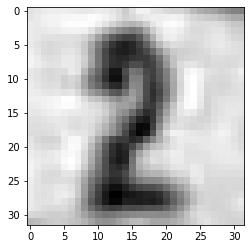

In [92]:
#Showing the image
plt.imshow(X_test[2].reshape(32, 32), cmap = 'gray')

In [93]:
test_pred = model.predict(X_test)
test_pred

563/563 [==============================] - 1s 1ms/step


array([[3.23367327e-01, 1.12663172e-01, 2.00824020e-03, ...,
        7.41668046e-03, 1.17328316e-01, 3.07685077e-01],
       [3.79973173e-08, 1.99839105e-05, 2.10401535e-01, ...,
        7.89535344e-01, 1.69334817e-06, 1.17116861e-06],
       [6.41131555e-05, 3.49806651e-05, 9.98735607e-01, ...,
        8.64796966e-05, 2.72828001e-05, 3.14996578e-04],
       ...,
       [1.50443695e-04, 7.14639993e-03, 1.32610910e-02, ...,
        9.75762665e-01, 3.98788077e-04, 8.23196024e-05],
       [2.28140689e-03, 3.20031686e-05, 1.16799679e-02, ...,
        1.07555501e-02, 7.90627208e-03, 8.33737552e-01],
       [1.16068612e-07, 1.10666093e-04, 9.96155918e-01, ...,
        2.70390476e-04, 1.83178975e-06, 3.66463496e-07]], dtype=float32)

In [94]:
for i in test_pred:
  predicted_num = np.argmax(i)
  print(predicted_num)

0
7
2
9
0
9
1
8
1
4
8
2
4
4
3
5
8
6
5
5
0
6
5
8
3
2
0
5
9
5
2
8
9
1
0
9
5
5
3
7
0
4
2
4
9
6
1
8
8
3
5
3
7
1
4
8
4
4
0
9
0
1
8
9
5
2
2
2
5
8
9
8
3
8
4
5
2
8
6
8
5
4
2
8
2
4
0
9
9
5
3
2
7
3
0
7
6
9
8
7
1
7
5
2
1
4
9
6
1
4
1
0
9
0
7
1
4
1
0
9
0
3
9
0
5
0
3
5
6
1
6
6
1
9
4
9
6
8
8
4
9
2
9
5
5
0
0
0
9
8
2
9
8
9
4
5
8
4
3
7
0
0
2
3
9
2
7
6
7
1
5
2
9
0
4
5
2
5
5
5
7
2
9
7
1
6
1
3
6
9
6
8
4
9
8
2
7
8
6
5
3
5
2
3
0
2
1
8
2
8
3
5
2
0
2
9
0
2
0
5
5
1
7
7
8
9
6
0
1
3
1
8
2
3
0
3
4
7
7
3
8
7
2
3
9
0
8
4
1
3
3
1
0
1
5
7
0
0
8
2
4
6
4
9
7
7
8
1
5
2
9
4
3
0
0
7
7
0
8
9
6
3
7
7
8
6
3
2
5
2
5
4
3
0
9
1
4
5
5
5
0
7
7
1
5
1
8
3
1
4
8
6
0
3
3
2
6
0
0
1
0
6
5
4
2
1
0
7
7
0
6
3
8
2
2
6
8
7
4
0
7
7
8
7
5
5
0
1
8
8
4
0
7
2
7
2
3
0
2
9
5
1
2
8
5
3
9
1
7
3
8
4
1
3
8
5
8
5
1
1
4
7
8
8
8
5
9
7
3
9
6
0
0
8
9
6
5
7
8
4
6
5
7
2
8
4
2
1
2
9
4
1
5
5
0
3
1
5
3
9
3
5
9
8
4
7
0
0
9
6
5
9
0
4
9
4
2
2
8
5
5
3
5
5
0
3
7
3
3
0
3
9
6
9
5
0
9
0
4
5
6
0
7
7
8
6
5
7
6
1
8
9
3
2
3
9
4
9
5
3
0
1
2
7
1
9
0
9
7
1
5
0
9
1
5
5
2
7
1
0


3
2
4
1
6
5
0
4
1
4
6
8
6
3
7
9
8
8
9
8
1
6
5
8
1
7
5
2
4
9
1
5
9
8
6
4
2
6
9
4
0
1
1
2
1
1
6
1
2
4
5
1
6
6
3
9
7
3
0
3
1
2
8
7
8
1
0
2
6
7
3
6
5
6
3
6
2
7
4
9
9
3
6
8
9
4
6
9
1
6
6
4
8
5
8
0
3
9
2
7
3
1
9
9
1
2
3
8
4
4
8
9
5
2
2
1
9
1
9
2
4
1
6
6
7
2
4
0
4
5
5
4
5
3
2
1
3
5
3
7
0
3
7
7
4
6
5
4
7
5
4
6
1
1
4
1
3
4
3
5
8
3
8
7
8
8
2
6
2
5
6
4
1
0
5
6
0
7
7
1
8
0
0
1
5
4
2
6
3
9
7
4
5
7
5
1
0
5
7
9
4
9
8
8
0
0
5
3
0
3
0
4
6
5
0
3
9
8
3
5
7
6
1
6
8
2
4
8
6
1
0
8
2
9
2
7
6
3
3
3
6
8
4
2
5
0
9
9
8
6
6
4
9
8
9
8
7
3
0
6
6
5
2
8
1
6
7
2
3
5
6
3
7
0
8
4
8
1
2
4
1
0
7
4
4
4
4
0
2
6
7
8
3
2
9
3
9
9
4
8
8
3
9
7
6
2
3
9
5
5
8
6
1
6
3
0
9
5
8
1
5
8
5
9
2
8
7
0
3
9
4
6
5
8
5
6
3
4
6
4
0
2
8
9
4
5
2
1
2
7
1
3
9
5
5
1
5
4
9
7
1
8
2
8
0
9
2
6
5
5
3
8
9
5
1
5
8
7
8
8
7
0
1
0
2
6
8
8
6
6
1
3
7
8
0
1
7
6
5
5
4
5
3
9
9
2
8
9
1
7
9
2
5
4
4
9
9
4
8
5
2
9
3
7
9
3
9
0
8
4
6
9
3
0
1
9
7
4
6
1
3
0
6
2
4
0
3
9
8
2
0
3
0
5
3
7
4
7
8
6
4
7
8
3
6
2
9
3
5
6
4
5
1
0
2
1
2
4
4
3
8
0
1
0
0
1
2
6
8
1
4
9
6
4
4
8
8
6
3
4


6
4
5
8
1
1
1
0
5
5
6
9
6
8
6
3
9
2
4
2
4
2
7
4
9
3
8
8
5
0
0
7
1
2
5
5
6
1
1
2
5
9
6
2
6
5
1
0
7
3
7
3
2
9
2
8
9
3
9
3
3
2
7
5
4
6
3
8
7
8
4
1
5
4
4
2
4
8
8
9
7
5
8
4
3
8
8
9
7
2
4
8
8
9
9
4
1
5
1
0
0
9
8
9
4
3
1
2
6
6
1
6
9
1
3
0
7
0
4
2
9
2
9
3
3
5
7
7
7
0
7
1
7
5
2
0
0
2
6
5
4
8
9
3
6
5
4
6
3
0
0
5
9
7
0
2
7
0
9
9
0
7
9
6
2
8
4
4
1
5
1
9
4
5
8
0
5
1
4
4
1
9
6
7
9
3
2
0
5
2
7
3
7
2
9
6
2
5
1
7
6
5
6
2
5
9
2
8
9
6
3
0
2
0
0
9
8
8
1
8
3
2
0
3
2
0
2
9
9
4
0
5
9
6
5
3
4
3
0
9
3
5
3
4
0
4
4
7
2
5
2
3
1
2
9
7
5
2
5
4
1
8
1
6
5
5
8
6
8
1
3
7
7
6
3
5
4
0
0
6
4
3
0
2
5
6
2
5
3
1
0
0
1
2
3
3
2
2
9
8
2
9
1
0
6
3
7
7
7
0
0
2
2
6
7
0
4
4
0
0
0
6
5
9
7
9
5
7
1
4
5
7
2
1
0
0
2
9
4
0
2
0
9
3
1
4
3
3
1
8
5
9
0
2
4
8
6
2
8
2
0
4
4
4
0
5
4
6
2
7
1
1
7
1
9
9
3
9
6
3
5
0
4
9
6
7
9
5
8
1
6
3
6
7
1
7
0
9
2
0
3
9
4
1
1
5
4
7
8
6
2
9
9
2
6
6
6
7
5
9
9
6
4
0
0
0
4
2
7
3
8
1
5
6
1
0
4
1
1
0
6
6
2
1
4
1
7
1
5
8
6
9
4
6
0
4
4
1
6
4
4
3
9
0
0
3
4
9
9
2
4
4
1
6
9
4
4
9
3
4
7
2
5
3
9
6
5
0
4
2
4
1
8
5
7
1
1
9
7
5


0
1
5
4
6
8
3
9
1
0
8
9
4
5
1
7
0
3
3
7
6
2
0
4
1
6
3
9
3
1
0
1
9
7
7
9
0
5
7
9
8
7
4
8
8
6
0
9
1
2
2
5
1
5
5
4
0
0
7
4
7
1
6
6
6
2
6
6
7
1
2
1
5
6
3
5
4
9
6
3
1
1
7
2
3
8
1
9
2
7
6
2
3
6
6
5
0
5
4
7
1
1
2
8
5
5
5
3
9
7
7
3
1
2
3
4
8
5
6
8
4
7
2
7
4
0
6
2
4
7
4
0
9
4
4
8
1
6
0
9
5
5
5
1
3
3
7
6
6
1
8
6
5
3
1
4
1
9
7
1
3
8
2
3
6
7
6
8
3
3
2
1
2
6
1
1
6
6
8
0
0
7
2
1
8
8
6
3
6
6
6
8
6
9
7
1
0
9
1
5
8
8
7
0
3
8
6
0
4
9
6
7
6
3
8
1
4
6
2
1
8
6
0
7
4
3
0
6
9
5
1
2
2
0
4
9
8
3
0
5
9
7
6
7
2
7
4
7
9
5
5
1
6
1
2
2
9
3
8
0
5
0
5
2
9
5
0
5
4
1
3
8
7
9
1
2
9
9
5
8
3
4
9
7
8
9
6
7
9
9
6
1
5
9
4
7
7
2
7
0
3
2
1
2
3
3
4
2
4
5
5
1
5
3
1
8
1
2
9
2
4
8
5
1
1
3
9
2
2
9
8
3
2
8
3
6
0
5
8
2
3
4
0
7
8
9
2
1
4
2
8
8
9
8
5
6
9
9
5
0
5
0
4
0
8
9
8
3
7
5
2
6
0
5
5
1
4
7
5
8
5
1
9
4
1
0
8
2
0
0
1
4
8
4
3
2
7
3
3
7
6
6
8
8
9
0
9
0
1
5
2
7
1
7
6
0
9
4
7
9
6
4
4
0
6
3
8
6
4
2
7
1
6
4
4
9
7
7
9
1
6
8
5
7
1
2
3
8
0
2
6
0
4
9
1
5
2
0
6
1
0
2
3
2
7
4
6
1
0
7
9
5
3
1
4
3
6
2
8
3
4
9
7
8
4
5
5
0
9
6
2
4
6
1
1
9
9
7
6
9


**Observation** - We can see that the Actual and Observed values are same for the above example.

##### C. Evaluate performance of the model with appropriate metrics.

In [95]:
print('Classification Report')
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1814
           1       0.86      0.83      0.84      1828
           2       0.91      0.78      0.84      1803
           3       0.82      0.75      0.78      1719
           4       0.90      0.84      0.87      1812
           5       0.83      0.79      0.81      1768
           6       0.89      0.78      0.83      1832
           7       0.91      0.83      0.87      1808
           8       0.86      0.76      0.80      1812
           9       0.82      0.79      0.81      1804

   micro avg       0.87      0.80      0.83     18000
   macro avg       0.87      0.80      0.83     18000
weighted avg       0.87      0.80      0.83     18000
 samples avg       0.80      0.80      0.80     18000



In [96]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)

print('Confusion Matrix')
print()

print(confusion_matrix(y_test_arg, Y_pred))

563/563 [==============================] - 1s 1ms/step
Confusion Matrix

[[1585   29    3   25   21   14   38   12   26   61]
 [  32 1571   22   27   58   10   16   35   28   29]
 [  31   34 1468   53   30   24    7   57   37   62]
 [  19   35   36 1345   24  117   30   25   42   46]
 [  28   51   27   25 1563   13   24    7   21   53]
 [  18   16   11  112   16 1435   48   11   46   55]
 [  50   28   13   31   38   75 1467    9   99   22]
 [  25   72   55   29   23   17   15 1537   11   24]
 [  32   43   26   58   31   58   65   19 1422   58]
 [  60   37   24   41   20   72   20   18   58 1454]]


##### D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

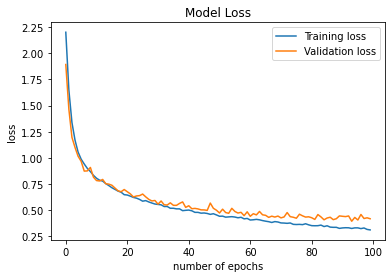

In [97]:
#Training loss and Validation loss vs number of epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.legend(['Training loss', 'Validation loss'], loc = 'upper right')
plt.show()

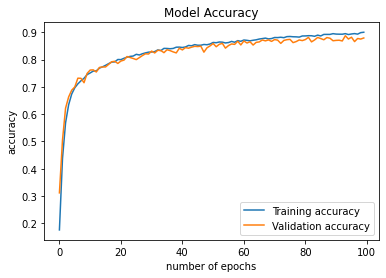

In [98]:
#Training accuracy and Training accuracy vs number of epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('number of epochs')
plt.legend(['Training accuracy', 'Validation accuracy'], loc = 'lower right')
plt.show()

**Conclusion** - 
- There are around 10 classes in the dataset which represent **digits from 0-9**.
- Designed a Neural Network to train a classifier using **Sigmoid activations and SGD optimizer** - Which yielded very low Validation score and changing learning rate further reduces it.
- Next, a simple sanity checks with **relu activation and SGD optimizer** and also **overfitting to a small subset of our dataset**, (in this case 20 images), to ensure our model architecture is good.
- Next, **relu activation and Adam optimizer** - which gives us the best results.
- Also printed the classification report, confusion matrix and summarized history for accuracy and loss.

------------------------